# Flight Rate Prediction Model

## Loading necessory libraries (Primary libraires)

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import pickle
import warnings
warnings.filterwarnings('ignore')

In [234]:
df = pd.read_excel("Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [235]:
df.iloc[6076]

Airline                            Jet Airways
Date_of_Journey                     18/05/2019
Source                                 Kolkata
Destination                           Banglore
Route                          CCU → BOM → BLR
Dep_Time                                 05:45
Arrival_Time                             18:15
Duration                               12h 30m
Total_Stops                             1 stop
Additional_Info    In-flight meal not included
Price                                    10844
Name: 6076, dtype: object

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [237]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Count'>

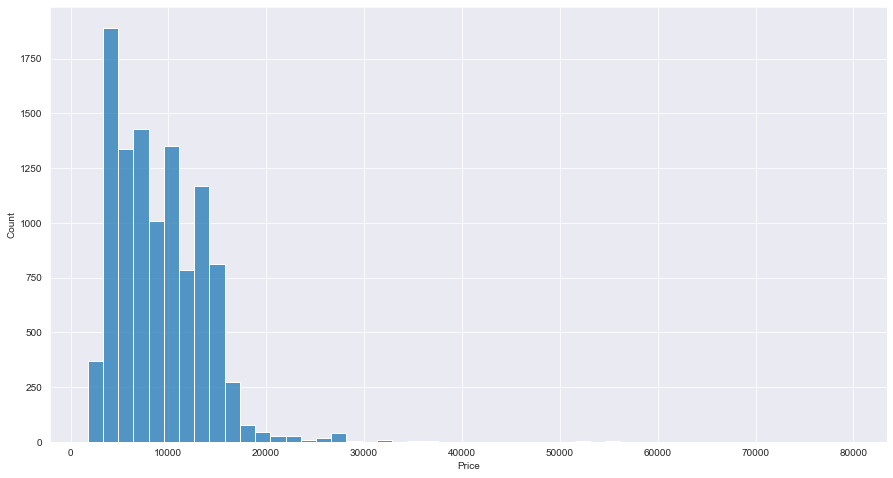

In [238]:
plt.figure(figsize = (15 , 8))
sns.histplot(data = df , x = "Price" , bins = 50)

In [239]:
for i in df.columns:
    print(f"The number of unique values in {i} column is/are : {len(df[i].unique())}")
    print("\n")
    print(f"The unique values in {i} column is/are : {df[i].unique()}")
    print("\n")
    print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
    print("\n\n")
    print("*"*100)
    print("\n\n")

The number of unique values in Airline column is/are : 12


The unique values in Airline column is/are : ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']


The value counts for each value in Airline column is/are :  
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64



****************************************************************************************************





### Converting Time columns to datetime format

In [240]:
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])
df["Dep_Time"] = pd.to_datetime(df["Dep_Time"])

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 918.2+ KB


In [242]:
df["day"] = df["Date_of_Journey"].dt.day
df["Month"] = df["Date_of_Journey"].dt.month

In [243]:
df["dep_hour"] = df["Dep_Time"].dt.hour
df["dep_minutes"] = df["Dep_Time"].dt.minute

### Converting Duration into minutes

In [244]:
def duration_convertion(x):
    if len(x.split()) == 2:
        one = int(x.split()[0][:-1])
        two = int(x.split()[1][:-1])
        return one * 60 + two
    else:
        return int(x[:-1]) * 60

In [245]:
df["Duration"] = df["Duration"].apply(duration_convertion)

In [246]:
df["Duration"]

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration, Length: 10683, dtype: int64

In [247]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,Month,dep_hour,dep_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-06-12 22:20:00,01:10 22 Mar,170,non-stop,No info,3897,24,3,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-12 05:50:00,13:15,445,2 stops,No info,7662,5,1,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-12 09:25:00,04:25 10 Jun,1140,2 stops,No info,13882,6,9,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-06-12 18:05:00,23:30,325,1 stop,No info,6218,5,12,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-06-12 16:50:00,21:35,285,1 stop,No info,13302,3,1,16,50


In [248]:
df.drop(["Route" , "Arrival_Time" , "Dep_Time" , "Date_of_Journey"] , axis = 1 , inplace = True)

In [249]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day,Month,dep_hour,dep_minutes
0,IndiGo,Banglore,New Delhi,170,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,445,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,1140,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,325,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,285,1 stop,No info,13302,3,1,16,50


In [250]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [251]:
df["Total_Stops"].fillna("1 stop" , inplace = True)

In [252]:
df.isna().sum()

Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
day                0
Month              0
dep_hour           0
dep_minutes        0
dtype: int64

### Preprocessing Stops column

In [253]:
df["Stops"] = df["Total_Stops"].str.split(" ").str[0]
df["Stops"].replace("non-stop" , 0 , inplace = True)

In [254]:
df["Stops"] = df["Stops"].apply(lambda x : int(x))
df["Stops"]

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Stops, Length: 10683, dtype: int64

### Dropping Features extracted columns

In [255]:
df.loc[df["Additional_Info"] == "No info" , ["Additional_Info"]] = "No Info"

In [256]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day,Month,dep_hour,dep_minutes,Stops
0,IndiGo,Banglore,New Delhi,170,non-stop,No Info,3897,24,3,22,20,0
1,Air India,Kolkata,Banglore,445,2 stops,No Info,7662,5,1,5,50,2
2,Jet Airways,Delhi,Cochin,1140,2 stops,No Info,13882,6,9,9,25,2
3,IndiGo,Kolkata,Banglore,325,1 stop,No Info,6218,5,12,18,5,1
4,IndiGo,Banglore,New Delhi,285,1 stop,No Info,13302,3,1,16,50,1


In [257]:
df.drop(["Total_Stops"] , axis = 1 , inplace = True)

## Data Preprocessing

In [258]:
cats = df.select_dtypes(include="object").columns.to_list()
cats

['Airline', 'Source', 'Destination', 'Additional_Info']

In [259]:
ints = df.select_dtypes(exclude="object").columns.to_list()
ints.remove("Price")

In [260]:
ints

['Duration', 'day', 'Month', 'dep_hour', 'dep_minutes', 'Stops']

### Features and labels splitting

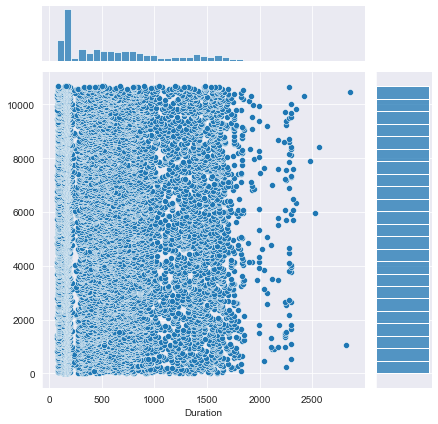

In [261]:
sns.jointplot(x = "Duration" , y = df.index , data = df)

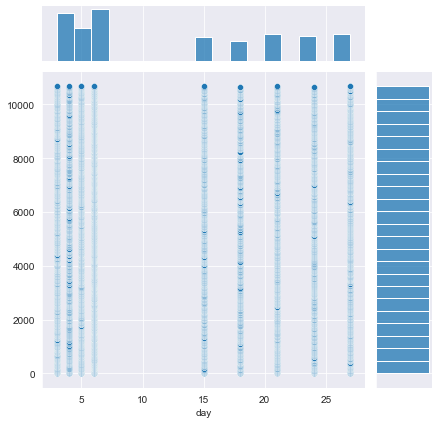

In [262]:
sns.jointplot(x = "day" , y = df.index , data = df)

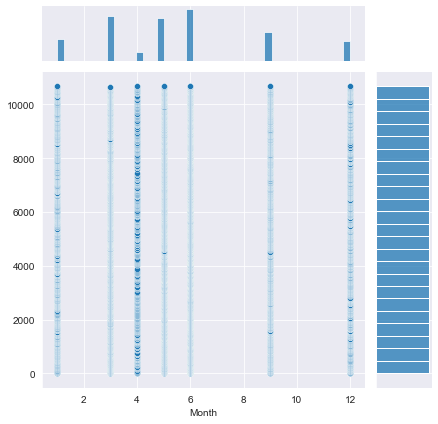

In [263]:
sns.jointplot(x = "Month" , y = df.index , data = df)

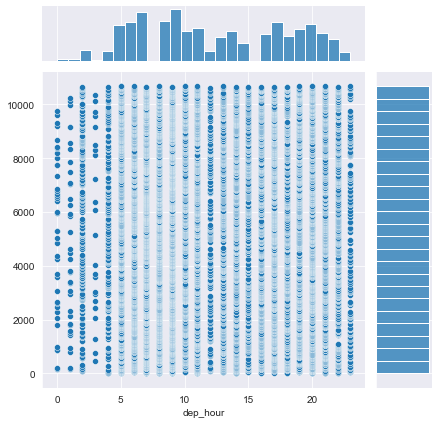

In [264]:
sns.jointplot(x = "dep_hour" , y = df.index , data = df)

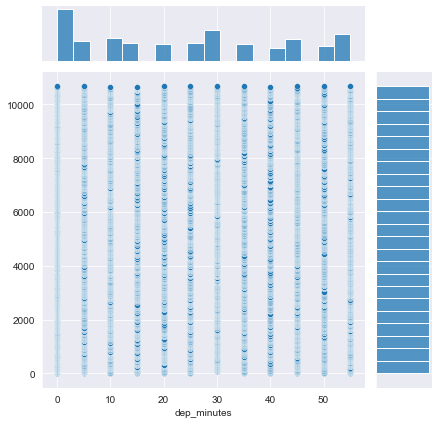

In [265]:
sns.jointplot(x = "dep_minutes" , y = df.index , data = df)

### Getting Dummies

In [266]:
df.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,day,Month,dep_hour,dep_minutes,Stops
0,IndiGo,Banglore,New Delhi,170,No Info,3897,24,3,22,20,0
1,Air India,Kolkata,Banglore,445,No Info,7662,5,1,5,50,2
2,Jet Airways,Delhi,Cochin,1140,No Info,13882,6,9,9,25,2
3,IndiGo,Kolkata,Banglore,325,No Info,6218,5,12,18,5,1
4,IndiGo,Banglore,New Delhi,285,No Info,13302,3,1,16,50,1


In [267]:
for i in df.columns:
    print(f"The number of unique values in {i} column is/are : {len(df[i].unique())}")
    print("\n")
    print(f"The unique values in {i} column is/are : {df[i].unique()}")
    print("\n")
    print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
    print("\n\n")
    print("*"*100)
    print("\n\n")

The number of unique values in Airline column is/are : 12


The unique values in Airline column is/are : ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']


The value counts for each value in Airline column is/are :  
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64



****************************************************************************************************





In [268]:
df = pd.get_dummies(df , columns = ["Airline" , "Source" , "Destination" , "Additional_Info"] , prefix = ["Airline" , "Source" , "Destination" , "Additional_Info"])

In [269]:
df.head()

,Duration,Price,day,Month,dep_hour,dep_minutes,Stops,Airline_Air Asia,Airline_Air India,Airline_GoAir,...,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,170,3897,24,3,22,20,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,445,7662,5,1,5,50,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1140,13882,6,9,9,25,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,325,6218,5,12,18,5,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,285,13302,3,1,16,50,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [270]:
df.iloc[6076]

Duration                                          750
Price                                           10844
day                                                18
Month                                               5
dep_hour                                            5
dep_minutes                                        45
Stops                                               1
Airline_Air Asia                                    0
Airline_Air India                                   0
Airline_GoAir                                       0
Airline_IndiGo                                      0
Airline_Jet Airways                                 1
Airline_Jet Airways Business                        0
Airline_Multiple carriers                           0
Airline_Multiple carriers Premium economy           0
Airline_SpiceJet                                    0
Airline_Trujet                                      0
Airline_Vistara                                     0
Airline_Vistara Premium econ

In [271]:
df

,Duration,Price,day,Month,dep_hour,dep_minutes,Stops,Airline_Air Asia,Airline_Air India,Airline_GoAir,...,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,170,3897,24,3,22,20,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,445,7662,5,1,5,50,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1140,13882,6,9,9,25,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,325,6218,5,12,18,5,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,285,13302,3,1,16,50,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,4107,4,9,19,55,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10679,155,4145,27,4,20,45,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
10680,180,7229,27,4,8,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10681,160,12648,3,1,11,30,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [272]:
X = df.drop(["Price"] , axis = 1)
y = df["Price"]

In [273]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(8546, 2137, 8546, 2137)

In [274]:
X_train.head()

,Duration,day,Month,dep_hour,dep_minutes,Stops,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
8990,605,3,12,6,30,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3684,1505,5,9,11,30,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1034,380,24,4,15,45,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3909,765,21,3,12,50,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3088,1560,24,6,17,15,2,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [275]:
X_test.head().T

,6076,3544,7313,5032,2483
Duration,750,540,345,140,335
day,18,6,5,24,21
Month,5,3,1,5,5
dep_hour,5,10,14,14,22
dep_minutes,45,35,5,45,50
Stops,1,1,1,0,1
Airline_Air Asia,0,0,0,0,0
Airline_Air India,0,0,0,0,0
Airline_GoAir,0,1,0,0,0
Airline_IndiGo,0,0,0,1,0


In [276]:
for i in ['Duration','day','Month','dep_hour','dep_minutes']:
    X_train[i] = np.log(X_train[i] + 1)
    X_test[i] = np.log(X_test[i] + 1)

In [277]:
X_test.head().T

,6076,3544,7313,5032,2483
Duration,6.621406,6.293419,5.846439,4.948760,5.817111
day,2.944439,1.945910,1.791759,3.218876,3.091042
Month,1.791759,1.386294,0.693147,1.791759,1.791759
dep_hour,1.791759,2.397895,2.708050,2.708050,3.135494
dep_minutes,3.828641,3.583519,1.791759,3.828641,3.931826
Stops,1.000000,1.000000,1.000000,0.000000,1.000000
Airline_Air Asia,0.000000,0.000000,0.000000,0.000000,0.000000
Airline_Air India,0.000000,0.000000,0.000000,0.000000,0.000000
Airline_GoAir,0.000000,1.000000,0.000000,0.000000,0.000000
Airline_IndiGo,0.000000,0.000000,0.000000,1.000000,0.000000


## Feature Scaling

In [278]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scale_cols = ["Duration" , "day" , "Month" , "dep_hour" , "dep_minutes"]
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [279]:
X_train.head().T

,8990,3684,1034,3909,3088
Duration,0.339097,1.346383,-0.174410,0.598353,1.386073
day,-1.410756,-0.838524,1.175565,0.995154,1.175565
Month,1.613559,1.085314,-0.310269,-0.759547,0.367185
dep_hour,-1.071813,-0.012163,0.553411,0.145198,0.784968
dep_minutes,0.566176,0.566176,0.844051,0.916703,0.100487
Stops,2.000000,1.000000,1.000000,1.000000,2.000000
Airline_Air Asia,0.000000,0.000000,0.000000,0.000000,0.000000
Airline_Air India,0.000000,0.000000,0.000000,0.000000,1.000000
Airline_GoAir,0.000000,0.000000,0.000000,0.000000,0.000000
Airline_IndiGo,0.000000,0.000000,0.000000,0.000000,0.000000


In [280]:
X_test.head().T

,6076,3544,7313,5032,2483
Duration,0.576471,0.213552,-0.281033,-1.274318,-0.313484
day,0.788252,-0.620971,-0.838524,1.175565,0.995154
Month,0.056817,-0.759547,-2.155130,0.056817,0.056817
dep_hour,-1.374869,-0.183225,0.426530,0.426530,1.266871
dep_minutes,0.844051,0.671461,-0.590113,0.844051,0.916703
Stops,1.000000,1.000000,1.000000,0.000000,1.000000
Airline_Air Asia,0.000000,0.000000,0.000000,0.000000,0.000000
Airline_Air India,0.000000,0.000000,0.000000,0.000000,0.000000
Airline_GoAir,0.000000,1.000000,0.000000,0.000000,0.000000
Airline_IndiGo,0.000000,0.000000,0.000000,1.000000,0.000000


## Model Fitting and Evaluation

In [281]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import mean_squared_log_error , mean_squared_error , mean_absolute_error , r2_score
from sklearn.model_selection import cross_val_score

In [282]:
models = []
models.append(['XGBRegressor', XGBRegressor(random_state = 42 , objective ='reg:squarederror')])
models.append(['RandomForest Regressor', RandomForestRegressor(random_state = 42)])
# models.append(['Linear Regression', LinearRegression()])
# models.append(['KNeigbors Regressor', KNeighborsRegressor()])

In [283]:
def metrics(model , X_train , y_train , X_test , y_test , params = False):
    
    mod = model[1].fit(X_train , y_train)
    preds = model[1].predict(X_test)
    accuracies = cross_val_score(estimator = model[1], X = X_train , y = y_train, cv = 10)
    log = mean_squared_log_error(preds , y_test)
    mse = mean_squared_error(preds , y_test , squared = False)
    mae = mean_absolute_error(preds , y_test)
    score = max(0 , 100 * r2_score(y_test , preds))
    
    print("\n")            
    print(model[0])
    
    print("\n")
    if params:
        print(f"Best Parameters are : \n" , model[1].best_params_)
        print("\n")
    
    print(f"Training score : {model[1].score(X_train , y_train):.4f}")
    print("\n") 
    
    print(f"Test Score : {model[1].score(X_test , y_test):.4f}")
    print("\n")
    
    print(f"K-fold accuracy : {np.mean(accuracies):.4f}")
    print("\n")
    
    print(f"Standard Deviation of Accuracies in k-fold : {np.std(accuracies):.4f}")
    print("\n")
    
    print(f"Mean Absolute Error : {mae:.4f}")
    print("\n")

    print(f"Root Mean Squared Error : {mse:.4f}")
    print("\n")

    print(f"Mean Squared Log Error : {log:.4f}")
    print("\n")
    
    print(f"R2_score : {score:.4f}")
                
    print("\n")            
    
    plt.scatter(y_test , preds)
    x = np.linspace(min(y_test) , max(y_test) , 100)
    y = x
    plt.plot(x, y , "-r")
    plt.show()
    print("\n")

    print("*"*100)
    
    print("\n\n")
    
    sam = []
    sam.append(model[0])
    sam.append(model[1].score(X_train , y_train))
    sam.append(model[1].score(X_test , y_test))
    sam.append(np.mean(accuracies))
    sam.append(np.std(accuracies))
    sam.append(mae)
    sam.append(mse)
    sam.append(log)
    sam.append(score)
    
    return sam , mod



XGBRegressor


Training score : 0.9615


Test Score : 0.8969


K-fold accuracy : 0.8850


Standard Deviation of Accuracies in k-fold : 0.0297


Mean Absolute Error : 818.2964


Root Mean Squared Error : 1476.9192


Mean Squared Log Error : 0.0190


R2_score : 89.6934




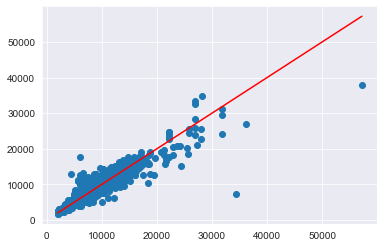



****************************************************************************************************





RandomForest Regressor


Training score : 0.9803


Test Score : 0.8796


K-fold accuracy : 0.8760


Standard Deviation of Accuracies in k-fold : 0.0355


Mean Absolute Error : 692.7888


Root Mean Squared Error : 1596.0984


Mean Squared Log Error : 0.0190


R2_score : 87.9629




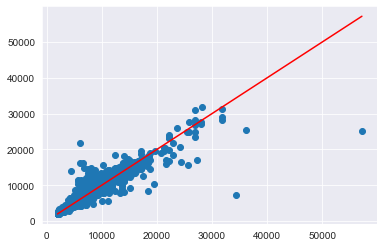



****************************************************************************************************



Wall time: 1min 9s


In [284]:
%%time

pre_final = []
for i in models:
    sam = metrics(i , X_train , y_train , X_test , y_test)
    pre_final.append(sam)

In [285]:
pre_final

[(['XGBRegressor',
   0.9615153603819656,
   0.8969337661524321,
   0.8849740109375702,
   0.029656194342874167,
   818.2964491534021,
   1476.9191835157092,
   0.019027302875562518,
   89.69337661524321],
  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None)),
 (['RandomForest Regressor',
   0.9803478326222529,
   0.8796288829000014,
   0.8760138263378092,
   0.03553597311803953,
   692.7887621368778,
   1596.0984419479457,
   0.019014346479057684,
   87.962

In [286]:
data_pre_final = [x[0] for x in pre_final]
data_pre_final

[['XGBRegressor',
  0.9615153603819656,
  0.8969337661524321,
  0.8849740109375702,
  0.029656194342874167,
  818.2964491534021,
  1476.9191835157092,
  0.019027302875562518,
  89.69337661524321],
 ['RandomForest Regressor',
  0.9803478326222529,
  0.8796288829000014,
  0.8760138263378092,
  0.03553597311803953,
  692.7887621368778,
  1596.0984419479457,
  0.019014346479057684,
  87.96288829000014]]

## Model Evaluation Visualization

In [287]:
me = pd.DataFrame(data_pre_final , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "MAE" , "RMSE" , "MLSE" , "R2_Score"])

me.sort_values(by = ["R2_Score" , "MLSE" , "RMSE" , "K-fold Accuracy" , "MAE" , "Train Score" , "Test Score"] , inplace = True , ascending = (False , True , True , False , True , False , False))
me = me.reset_index(drop = True)
me

,Model,Train Score,Test Score,K-fold Accuracy,K-fold Std,MAE,RMSE,MLSE,R2_Score
0,XGBRegressor,0.961515,0.896934,0.884974,0.029656,818.296449,1476.919184,0.019027,89.693377
1,RandomForest Regressor,0.980348,0.879629,0.876014,0.035536,692.788762,1596.098442,0.019014,87.962888


In [288]:
# plt.figure(figsize = (10 , 5))
# sns.barplot(y = "Model" , x = "R2_Score" , data = me)
# plt.title("Model Comparision based on MLSE");

In [289]:
# plt.figure(figsize = (10 , 5))
# sns.barplot(y = "Model" , x = "MLSE" , data = me)
# plt.title("Model Comparision based on MLSE");

In [290]:
# plt.figure(figsize = (10 , 5))
# sns.barplot(y = "Model" , x = "RMSE" , data = me)
# plt.title("Model Comparision based on RMLSE");

In [291]:
# plt.figure(figsize = (10 , 5))
# sns.barplot(y = "Model" , x = "K-fold Accuracy" , data = me)
# plt.title("Model Comparision based on K-fold Accuracy");

## Model Evaluation With GridSearchCV

In [292]:
from sklearn.model_selection import GridSearchCV


grid_xgb = {"n_estimators" : [100 , 200 , 300 , 400]}


# grid_random = {"n_estimators" : [100 , 200 , 250 , 300], 
#               "max_features" : ['auto', 'sqrt' , "log2"] , 
#               "min_samples_leaf" : [2, 4] , 
#               "max_depth" : [5 , 7 , 10]}

### We will perform only on XGB due to lack of computation power



XGBRegressor


Best Parameters are : 
 {'n_estimators': 200}


Training score : -0.0055


Test Score : -0.0176


K-fold accuracy : -0.0180


Standard Deviation of Accuracies in k-fold : 0.0022


Mean Absolute Error : 749.4666


Root Mean Squared Error : 1435.1545


Mean Squared Log Error : 0.0176


R2_score : 90.2680




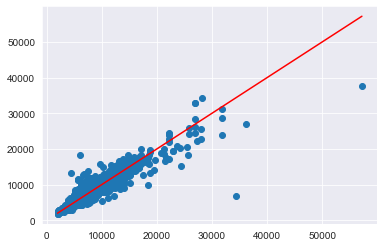



****************************************************************************************************



Wall time: 8min 18s


In [293]:
%%time

xgb = metrics(['XGBRegressor', GridSearchCV(XGBRegressor(random_state = 42 , objective ='reg:squarederror') , param_grid = grid_xgb , cv = 5 , verbose = 0 , scoring = "neg_mean_squared_log_error")] ,  X_train , y_train , X_test , y_test , params = True )

### Optional Runcell

In [294]:
# %%time

# random = metrics(['RandomForest Regressor', GridSearchCV(RandomForestRegressor(random_state = 42) , param_grid = grid_random , cv = 5 , verbose = 0 , scoring = "neg_mean_squared_log_error"  , n_jobs = -1)] ,  X_train , y_train , X_test , y_test , params = True )

## Getting Feature Importances

In [295]:
def feature_importance(model , X_train , y_train):
    features = model.feature_importances_
    print(f"Feature importance list : \n" , features)
    print("\n")
    plt.figure(figsize = (15 , 8))
    sns.barplot(X_train.columns.tolist() , features)
    plt.show()
    print("\n")
    print("*"*100)
    print("\n")
    return list(zip(features , X_train.columns))

In [296]:
xgb = XGBRegressor(random_state = 42 , objective ='reg:squarederror' , n_estimators = 200)
xgb.fit(X_train , y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Feature importance list : 
 [5.3414918e-02 2.4423396e-02 1.5607272e-02 6.5301158e-03 6.6566085e-03
 4.0481605e-02 9.9031013e-03 2.1182572e-02 1.3047772e-02 2.9068984e-02
 1.2389316e-01 3.4096500e-01 3.2411229e-02 1.3958875e-02 2.4949240e-02
 8.4490352e-04 1.0075304e-02 3.5714274e-05 2.0298483e-02 2.7772135e-03
 9.7103100e-03 1.7135102e-02 5.8854739e-03 0.0000000e+00 0.0000000e+00
 1.7033463e-02 0.0000000e+00 0.0000000e+00 1.0495986e-02 5.5874768e-03
 2.0643799e-03 7.4638799e-03 6.7486160e-02 2.1951837e-03 5.4340042e-02
 9.8022372e-03 1.4958190e-04 1.2521406e-04]




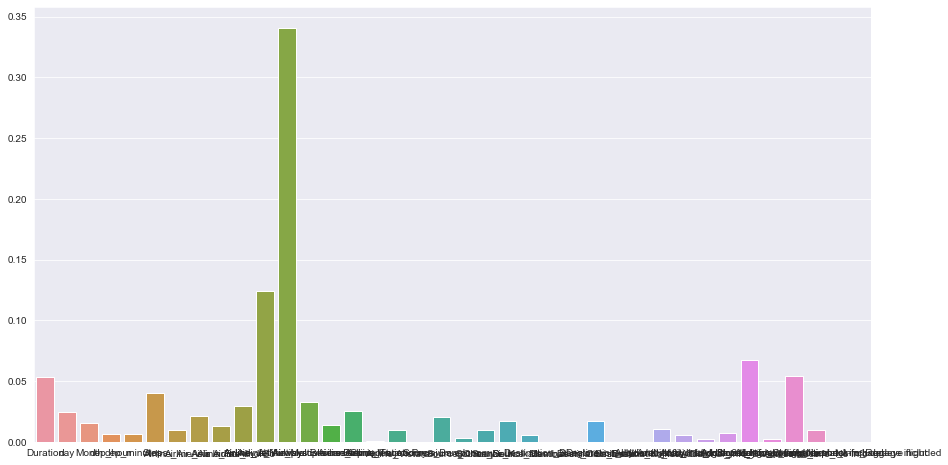



****************************************************************************************************




In [297]:
xgb_fi = feature_importance(xgb , X_train , y_train)

In [298]:
xgb_df = pd.DataFrame(xgb_fi , columns = ["Feature Importances" , "Feartures"]).sort_values(by = ["Feature Importances"] , ascending = False).reset_index(drop = True)

In [299]:
xgb_df

,Feature Importances,Feartures
0,0.340965,Airline_Jet Airways Business
1,0.123893,Airline_Jet Airways
2,0.067486,Additional_Info_Business class
3,0.054340,Additional_Info_In-flight meal not included
4,0.053415,Duration
5,0.040482,Stops
6,0.032411,Airline_Multiple carriers
7,0.029069,Airline_IndiGo
8,0.024949,Airline_SpiceJet
9,0.024423,day


so we can drop columns with 0 importance

In [300]:
X

,Duration,day,Month,dep_hour,dep_minutes,Stops,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,170,24,3,22,20,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,445,5,1,5,50,2,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1140,6,9,9,25,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,325,5,12,18,5,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,285,3,1,16,50,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,4,9,19,55,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10679,155,27,4,20,45,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10680,180,27,4,8,20,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10681,160,3,1,11,30,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [301]:
X.drop(["Destination_Banglore" , "Destination_Kolkata" , "Destination_Hyderabad" , "Destination_Cochin"] , axis = 1 , inplace = True)

In [302]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(8546, 2137, 8546, 2137)

In [303]:
for i in ['Duration','day','Month','dep_hour','dep_minutes']:
    X_train[i] = np.log(X_train[i] + 1)
    X_test[i] = np.log(X_test[i] + 1)

In [304]:
scaler = StandardScaler()

scale_cols = ["Duration" , "day" , "Month" , "dep_hour" , "dep_minutes"]
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [305]:
X_train.head().T

,8990,3684,1034,3909,3088
Duration,0.339097,1.346383,-0.174410,0.598353,1.386073
day,-1.410756,-0.838524,1.175565,0.995154,1.175565
Month,1.613559,1.085314,-0.310269,-0.759547,0.367185
dep_hour,-1.071813,-0.012163,0.553411,0.145198,0.784968
dep_minutes,0.566176,0.566176,0.844051,0.916703,0.100487
Stops,2.000000,1.000000,1.000000,1.000000,2.000000
Airline_Air Asia,0.000000,0.000000,0.000000,0.000000,0.000000
Airline_Air India,0.000000,0.000000,0.000000,0.000000,1.000000
Airline_GoAir,0.000000,0.000000,0.000000,0.000000,0.000000
Airline_IndiGo,0.000000,0.000000,0.000000,0.000000,0.000000


In [306]:
X_test.head().T

,6076,3544,7313,5032,2483
Duration,0.576471,0.213552,-0.281033,-1.274318,-0.313484
day,0.788252,-0.620971,-0.838524,1.175565,0.995154
Month,0.056817,-0.759547,-2.155130,0.056817,0.056817
dep_hour,-1.374869,-0.183225,0.426530,0.426530,1.266871
dep_minutes,0.844051,0.671461,-0.590113,0.844051,0.916703
Stops,1.000000,1.000000,1.000000,0.000000,1.000000
Airline_Air Asia,0.000000,0.000000,0.000000,0.000000,0.000000
Airline_Air India,0.000000,0.000000,0.000000,0.000000,0.000000
Airline_GoAir,0.000000,1.000000,0.000000,0.000000,0.000000
Airline_IndiGo,0.000000,0.000000,0.000000,1.000000,0.000000




XGBRegressor


Training score : 0.9615


Test Score : 0.8969


K-fold accuracy : 0.8850


Standard Deviation of Accuracies in k-fold : 0.0297


Mean Absolute Error : 818.2964


Root Mean Squared Error : 1476.9192


Mean Squared Log Error : 0.0190


R2_score : 89.6934




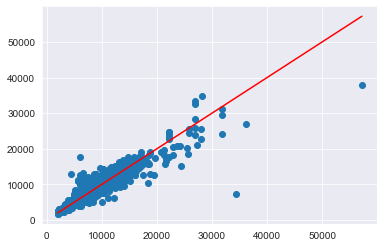



****************************************************************************************************





RandomForest Regressor


Training score : 0.9804


Test Score : 0.8799


K-fold accuracy : 0.8762


Standard Deviation of Accuracies in k-fold : 0.0355


Mean Absolute Error : 690.2979


Root Mean Squared Error : 1594.3324


Mean Squared Log Error : 0.0189


R2_score : 87.9895




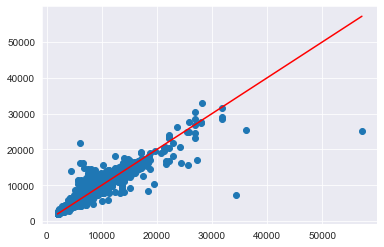



****************************************************************************************************



Wall time: 1min 6s


In [307]:
%%time

final = []
for i in models:
    sam = metrics(i , X_train , y_train , X_test , y_test)
    final.append(sam)

In [308]:
final

[(['XGBRegressor',
   0.9615153603819656,
   0.8969337661524321,
   0.8849740109375702,
   0.029656194342874167,
   818.2964491534021,
   1476.9191835157092,
   0.019027302875562518,
   89.69337661524321],
  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None)),
 (['RandomForest Regressor',
   0.9803927041418331,
   0.8798951062603962,
   0.876167056122257,
   0.035459647504395335,
   690.297929148933,
   1594.3324290203834,
   0.018933514626201693,
   87.9895

In [309]:
data_final = [x[0] for x in final]
data_final

[['XGBRegressor',
  0.9615153603819656,
  0.8969337661524321,
  0.8849740109375702,
  0.029656194342874167,
  818.2964491534021,
  1476.9191835157092,
  0.019027302875562518,
  89.69337661524321],
 ['RandomForest Regressor',
  0.9803927041418331,
  0.8798951062603962,
  0.876167056122257,
  0.035459647504395335,
  690.297929148933,
  1594.3324290203834,
  0.018933514626201693,
  87.98951062603962]]

In [310]:
# Before removing useless columns
me

,Model,Train Score,Test Score,K-fold Accuracy,K-fold Std,MAE,RMSE,MLSE,R2_Score
0,XGBRegressor,0.961515,0.896934,0.884974,0.029656,818.296449,1476.919184,0.019027,89.693377
1,RandomForest Regressor,0.980348,0.879629,0.876014,0.035536,692.788762,1596.098442,0.019014,87.962888


In [311]:
# After Removing useless columns

mef = pd.DataFrame(data_final , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "MAE" , "RMSE" , "MLSE" , "R2_Score"])

mef.sort_values(by = ["R2_Score" , "MLSE" , "RMSE" , "K-fold Accuracy" , "MAE" , "Train Score" , "Test Score"] , inplace = True , ascending = (False , True , True , False , True , False , False))
mef = mef.reset_index(drop = True)
mef

,Model,Train Score,Test Score,K-fold Accuracy,K-fold Std,MAE,RMSE,MLSE,R2_Score
0,XGBRegressor,0.961515,0.896934,0.884974,0.029656,818.296449,1476.919184,0.019027,89.693377
1,RandomForest Regressor,0.980393,0.879895,0.876167,0.035460,690.297929,1594.332429,0.018934,87.989511


## Final model

In [312]:
xgb = XGBRegressor(random_state = 42 , objective ='reg:squarederror' , n_estimators = 200)
xgb.fit(X_train , y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Feature importance list : 
 [5.3414922e-02 2.4423398e-02 1.5607274e-02 6.5301168e-03 6.6566090e-03
 4.0481608e-02 9.9031022e-03 2.1182574e-02 1.3047774e-02 2.9068988e-02
 1.2389317e-01 3.4096503e-01 3.2411233e-02 1.3958877e-02 2.4949241e-02
 8.4490364e-04 1.0075306e-02 3.5714278e-05 2.0298485e-02 2.7772137e-03
 9.7103119e-03 1.7135104e-02 5.8854748e-03 1.7033465e-02 1.0495987e-02
 5.5874772e-03 2.0643801e-03 7.4638808e-03 6.7486167e-02 2.1951839e-03
 5.4340050e-02 9.8022381e-03 1.4958192e-04 1.2521408e-04]




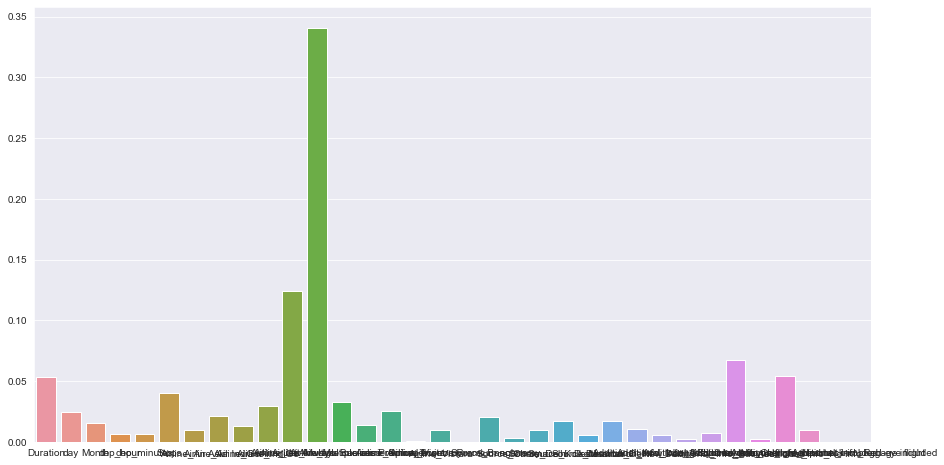



****************************************************************************************************




In [313]:
xgb_fi = feature_importance(xgb , X_train , y_train)

In [314]:
xgb_df = pd.DataFrame(xgb_fi , columns = ["Feature Importances" , "Feartures"]).sort_values(by = ["Feature Importances"] , ascending = False).reset_index(drop = True)

In [315]:
xgb_df

,Feature Importances,Feartures
0,0.340965,Airline_Jet Airways Business
1,0.123893,Airline_Jet Airways
2,0.067486,Additional_Info_Business class
3,0.054340,Additional_Info_In-flight meal not included
4,0.053415,Duration
5,0.040482,Stops
6,0.032411,Airline_Multiple carriers
7,0.029069,Airline_IndiGo
8,0.024949,Airline_SpiceJet
9,0.024423,day


In [316]:
preds = xgb.predict(X_test)
preds

array([11054.794 ,  6385.719 , 14665.508 , ...,  6416.9385,  4814.287 ,
       14262.088 ], dtype=float32)

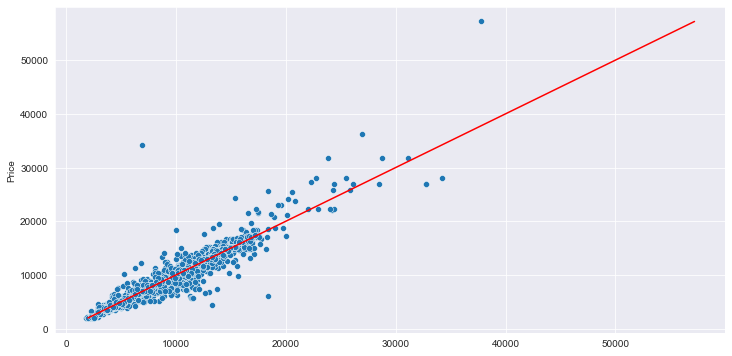

In [317]:
plt.figure(figsize = (12 , 6))
sns.scatterplot(preds , y_test)
x = np.linspace(min(y_test) , max(y_test) , 100)
y = x
plt.plot(x, y , "-r")

<AxesSubplot:xlabel='Price', ylabel='Density'>

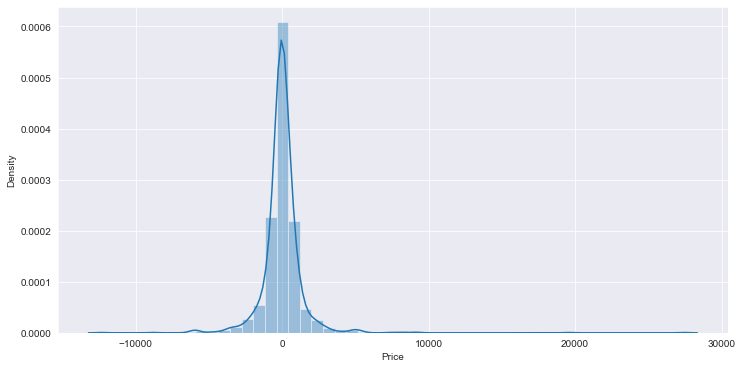

In [318]:
plt.figure(figsize = (12 , 6))
sns.distplot(y_test - preds)

In [319]:
from pickle import dump
dump(xgb , open('model.pkl', 'wb'))

In [320]:
dump(scaler, open("scaler.pkl", 'wb'))